## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from cvxopt import matrix, solvers

import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.concat([train, test])
df.shape

(70000, 785)

## Checking Null Values

In [6]:
df.isna().sum().sort_values(ascending=False)

0      0
516    0
518    0
519    0
520    0
      ..
264    0
265    0
266    0
267    0
784    0
Length: 785, dtype: int64

## Data Visualization

In [7]:
X = df.iloc[:, 1:]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df.iloc[:, 0]

Actual Label: 3


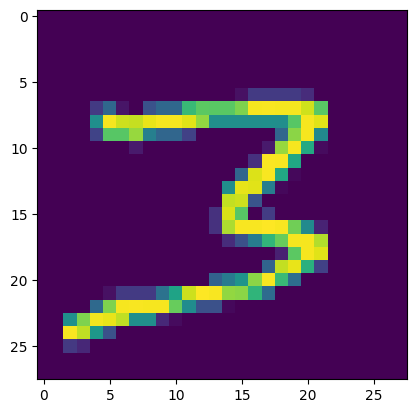

In [9]:
image_index = np.random.randint(0, 60000)

def plot_image(data, label, index):
    img = data.iloc[index].values.reshape(28, 28)
    print("Actual Label:", label.iloc[index])
    plt.imshow(img)

plot_image(X, y, image_index)

## Removing Irrelevant Features

In [10]:
df_cleaned = df.loc[:, df.sum() != 0]
df_cleaned.head()

,0,13,14,15,16,33,34,35,36,37,...,771,772,773,774,775,776,777,778,779,780
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data

In [11]:
def train_validate_test_split(data, labels, test_ratio=0.3, val_ratio=0):
    indices = np.arange(len(data))
    np.random.shuffle(indices)

    test_size = int(len(data) * test_ratio)
    val_size = int(len(data) * val_ratio)
    train_size = len(data) - test_size - val_size

    train_indices = indices[:train_size]
    val_indices = indices[train_size : train_size + val_size]
    test_indices = indices[train_size + val_size :]

    return (
        data.iloc[train_indices],
        labels.iloc[train_indices],
        data.iloc[val_indices],
        labels.iloc[val_indices],
        data.iloc[test_indices],
        labels.iloc[test_indices],
    )

In [12]:
X_cleaned = df_cleaned.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, y_train, X_val, y_val, X_test, y_test = train_validate_test_split(X_cleaned, y, test_ratio=0.2)

In [13]:
print("Train")
print(X_train.shape)
print(y_train.shape)
print(20*"-")
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(56000, 719)
(56000,)
--------------------
Test
(14000, 719)
(14000,)


## Scaling the Data

In [14]:
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
# X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

In [15]:
X_train_norm.min(axis=1).min(), X_train_norm.max(axis=1).max()

(0.0, 0.2790270547374771)

## Subsetting the Train Datasets for Time-Consuming Training

In [16]:
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_norm, y_train, train_size=0.01, stratify=y_train, random_state=42)

In [17]:
X_train_subset.shape

(560, 719)

## Quadratic Problem Solution

In [18]:
def solve_quad(X, y, X2, C=1):
    N = len(y)
    K = X2 * np.outer(y, y)
    P = matrix(K)
    q = matrix(-np.ones(N))
    G = matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = matrix(np.hstack((np.zeros(N), np.ones(N) * C)))
    A = matrix(y, (1, N), 'd')
    b = matrix(0.0)

    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])

    return alphas

## Calculate the Weight and Bias

In [19]:
def rbf_kernel(X, sigma=1.0):
    dist_matrix = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    
    X2 = np.exp(-dist_matrix / (2 * sigma**2))
    
    return X2

def train(X, y):
    classifiers = []
    X2 = rbf_kernel(X)
    for i in range(10):
        y_aug = np.where(y == i, 1, -1)[:, None]
        
        alphas = solve_quad(X, y_aug, X2)
        w = np.sum(alphas[:, None] * y_aug * X, axis=0)
        support_vectors = np.where(alphas > 1e-5)[0]
        b = np.mean([y_aug[i] - np.dot(w, X[i]) for i in support_vectors])
        classifiers.append((w, b))
    return classifiers

## Get Predictions

In [20]:
def predict(X_test, classifiers):
    predictions = []
    for x in X_test:
        scores = [np.dot(w, x.reshape(-1, 1)) + b for w, b in classifiers]
        predictions.append(np.argmax(scores))
    return np.array(predictions)

## Draw Decision Boundary

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_norm)
X_test_2d = pca.transform(X_test_norm)
X_train_2d_subset, _, y_train_2d_subset, _ = train_test_split(X_train_2d, y_train, train_size=0.01, stratify=y_train, random_state=42)
classifiers_2d = train(X_train_2d_subset, y_train_2d_subset)

In [22]:
x_min, x_max = X_train_2d[:, 0].min(), X_train_2d[:, 0].max()
y_min, y_max = X_train_2d[:, 1].min(), X_train_2d[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

Z = predict(np.c_[xx.ravel(), yy.ravel()], classifiers_2d)
Z = Z.reshape(xx.shape)

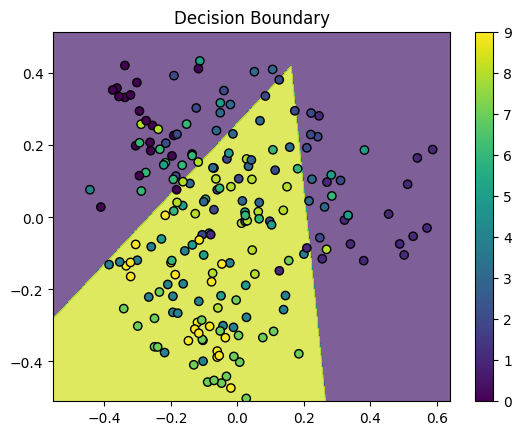

In [23]:
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.7)
scatter = plt.scatter(X_train_2d[:200, 0], X_train_2d[:200, 1], c=y_train[:200], cmap='viridis', edgecolors='k', marker='o')

plt.colorbar(scatter)
plt.title('Decision Boundary')
plt.show()

## Model Evaluation

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
classifiers = train(X_train_subset, y_train_subset)
y_pred = predict(X_test_norm, classifiers)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1325
           1       0.91      0.95      0.93      1573
           2       0.85      0.83      0.84      1431
           3       0.76      0.86      0.81      1448
           4       0.84      0.83      0.83      1345
           5       0.80      0.68      0.73      1297
           6       0.87      0.91      0.89      1403
           7       0.90      0.85      0.87      1424
           8       0.81      0.78      0.79      1345
           9       0.74      0.78      0.76      1409

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



## Visualize and Test

In [26]:
X_test_full = X.iloc[X_test.index, :].reset_index(drop=True)

Image index:  12430
Predicted: 3
Actual Label: 3


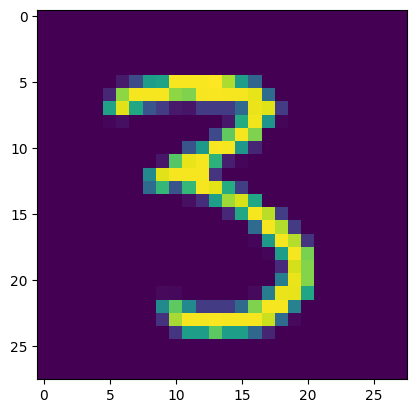

In [27]:
image_index = np.random.randint(0, X_test_full.shape[0])
print("Image index: ", image_index)
print(f"Predicted: {y_pred[image_index]}")
plot_image(X_test_full, y_test, image_index)

## Testing with Built-In SVM

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}


svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)
grid_search.fit(X_train_subset, y_train_subset)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Accuracy:", grid_search.best_score_)

best_model = SVC(**best_params)
best_model.fit(X_train_norm, y_train)
y_pred = best_model.predict(X_test_norm)

# Evaluate the final model
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8910714285714286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1325
           1       0.99      1.00      0.99      1573
           2       0.98      0.99      0.99      1431
           3       0.98      0.98      0.98      1448
           4       0.99      0.99      0.99      1345
           5       0.98      0.97      0.98      1297
           6       0.99      0.99      0.99      1403
           7       0.98      0.99      0.98      1424
           8       0.99      0.97      0.98      1345
           9       0.98      0.98      0.98      1409

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



## Testing Random Forests

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_subset, y_train_subset)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", round(best_score * 100, 4), "%")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_norm, y_train)
y_pred = best_rf.predict(X_test_norm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 86.25 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1325
           1       0.98      0.99      0.99      1573
           2       0.97      0.97      0.97      1431
           3       0.96      0.96      0.96      1448
           4       0.97      0.97      0.97      1345
           5       0.98      0.96      0.97      1297
           6       0.98      0.99      0.98      1403
           7       0.97      0.97      0.97      1424
           8       0.95      0.94      0.95      1345
           9       0.95      0.95      0.95      1409

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     

## Testing Neural Networks

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    
    model.add(Dense(
        hp.Int('units_layer1', min_value=128, max_value=512, step=64),
        activation='relu',
        input_shape=(X_cleaned.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(
        hp.Int('units_layer2', min_value=64, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(
        hp.Int('units_layer3', min_value=32, max_value=64, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_layer3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(32,activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5,
    restore_best_weights=True
)

tuner.search(X_train_norm, y_train, validation_split=0.2, epochs=10, callbacks=[reduce_lr, early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50, callbacks=[[reduce_lr, early_stopping]])

Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.5785 - accuracy: 0.8294 - val_loss: 0.2577 - val_accuracy: 0.9252 - lr: 2.3554e-04
Epoch 2/50
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2341 - accuracy: 0.9310 - val_loss: 0.1889 - val_accuracy: 0.9418 - lr: 2.3554e-04
Epoch 3/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.1681 - accuracy: 0.9502 - val_loss: 0.1349 - val_accuracy: 0.9577 - lr: 2.3554e-04
Epoch 4/50
1400/1400 [==============================] - 6s 5ms/step - loss: 0.1298 - accuracy: 0.9604 - val_loss: 0.1165 - val_accuracy: 0.9629 - lr: 2.3554e-04
Epoch 5/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.1059 - val_accuracy: 0.9681 - lr: 2.3554e-04
Epoch 6/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.0948 - val_accuracy: 0.9706

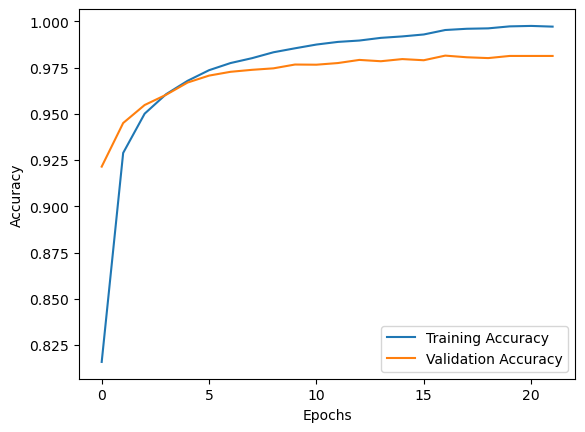

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
best_hps.values

{'units_layer1': 448,
 'dropout_layer1': 0.2,
 'units_layer2': 192,
 'dropout_layer2': 0.1,
 'units_layer3': 64,
 'dropout_layer3': 0.1,
 'learning_rate': 0.00023553594488703454}

In [44]:
y_pred = best_model.predict(X_test_norm)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1359
           1       0.99      0.98      0.99      1555
           2       0.98      0.98      0.98      1453
           3       0.98      0.97      0.98      1460
           4       0.99      0.98      0.98      1372
           5       0.98      0.97      0.97      1257
           6       0.99      0.98      0.99      1403
           7       0.98      0.99      0.98      1423
           8       0.97      0.98      0.97      1354
           9       0.97      0.97      0.97      1364

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

